# Project Foundations for Data Science: FoodHub Data Analysis

### **Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### **Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

### **Data Dictionary**

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mapping the appropriate drive to save/import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# reading the data and observing the first 10 rows
df = pd.read_csv('/content/drive/MyDrive/MIT/Course 1/Project Assessment - FoodHub/foodhub_order.csv')
df.head(10)

NameError: ignored

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# getting dataframe shape
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# getting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: column data types: Columns [0, 1, 7, 8] == integer, Columns [2, 3, 5, 6] == object, Column [4] == float

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# looking for missing values
df.nunique(axis = 0, dropna = False)

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [ ]:
# exlcuding any missing values
df.nunique(axis = 0, dropna = True)

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observations: Since `dropna` didn't result in any differences in the dataframe's shape, I can assume that there likely are no missing values to treat.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# getting statistical summary of the dataframe
df.describe(include = 'all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations: Minimum = 20, Average = ~27.4, Maximum = 35


### **Question 5:** How many orders are not rated?

In [ ]:
# getting unrated rows
df['rating'].value_counts()['Not given']

736

#### Observations: Of the total rows within the column 'rating', 736 orders are unrated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='day_of_the_week', ylabel='count'>

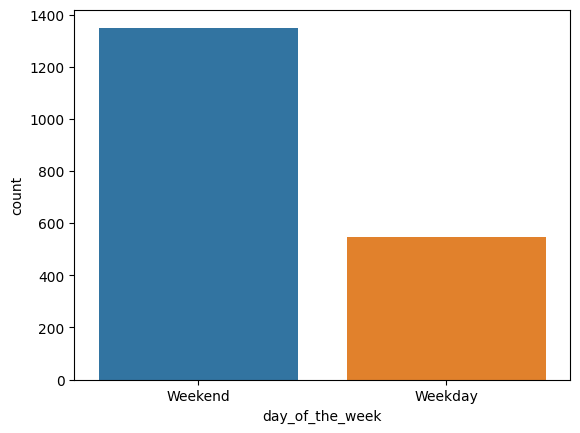

In [ ]:
# exploring when orders are being placed
sns.countplot(data = df, x = 'day_of_the_week')

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

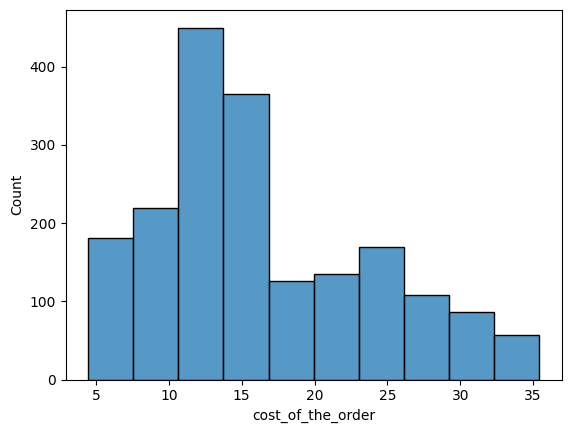

In [ ]:
# exploring distribution of cost per order
sns.histplot(data = df, x = 'cost_of_the_order', bins = 10)

<Axes: xlabel='rating', ylabel='count'>

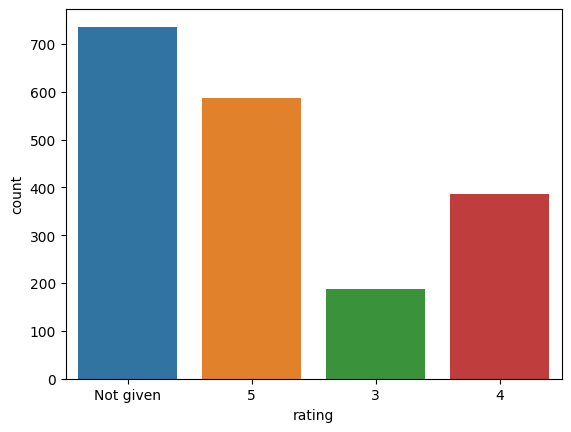

In [ ]:
# exploring distribution of ratings per order
sns.countplot(data = df, x = 'rating')

<Axes: xlabel='food_preparation_time'>

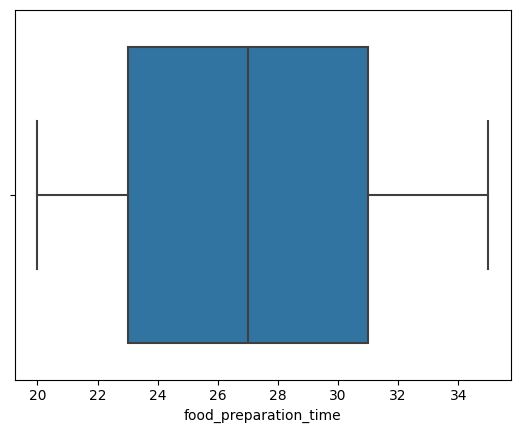

In [ ]:
# exploring distribution of preparation time
sns.boxplot(data = df, x = 'food_preparation_time')

<Axes: xlabel='delivery_time'>

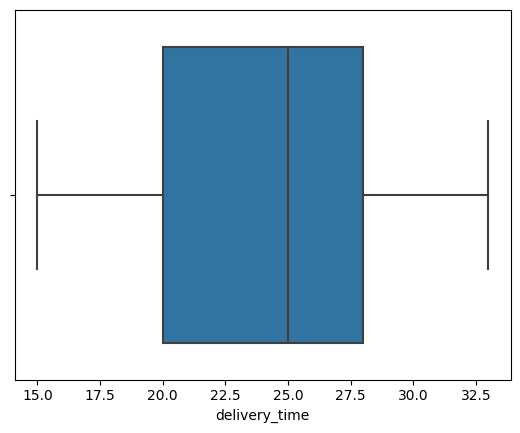

In [ ]:
# exploring distribution of delivery time
sns.boxplot(data = df, x = 'delivery_time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# grouping restaurant names, counting them, then displaying the top 5 restaurants based on the count
df['restaurant_name'].groupby(df['restaurant_name']).value_counts().nlargest(5)

restaurant_name            restaurant_name          
Shake Shack                Shake Shack                  219
The Meatball Shop          The Meatball Shop            132
Blue Ribbon Sushi          Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken  Blue Ribbon Fried Chicken     96
Parm                       Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants by number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df['cuisine_type'].groupby(df['day_of_the_week']).value_counts().nlargest(5)

day_of_the_week  cuisine_type
Weekend          American        415
                 Japanese        335
                 Italian         207
Weekday          American        169
Weekend          Chinese         163
Name: cuisine_type, dtype: int64

#### Observations: The most popular cuisine on the weekend is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# calculating percentage of orders over $20
over_20 = df['cost_of_the_order'] > 20

over_20.value_counts(normalize = True) # normalizing to observe the ratio of T:F as a number between 0 and 1 rather than counting integers, which gives us our percentage.

False    0.707587
True     0.292413
Name: cost_of_the_order, dtype: float64

#### Observations: ~29.2% of orders cost over $20.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# calculating the mean delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations: The average delivery time is 24.16 minutes, or 24 minutes and 9.72 seconds.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# finding the most frequent customers by grouping by most frequently occurring customer ID number
df['customer_id'].groupby(df['customer_id']).value_counts().nlargest(3)

customer_id  customer_id
52832        52832          13
47440        47440          10
83287        83287           9
Name: customer_id, dtype: int64

#### Observations: Top 3 customers' IDs are 52832, 47440, and 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


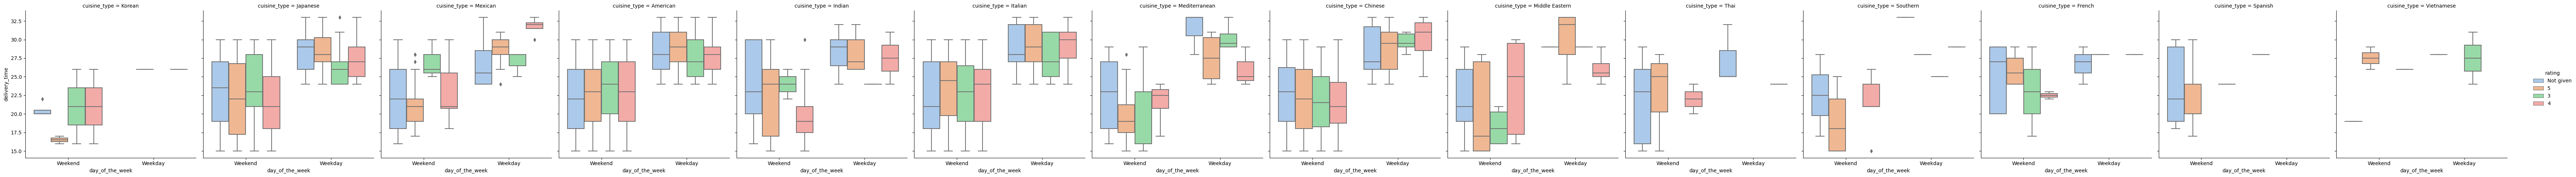

In [ ]:
# exploring potential relationships between delivery time, the day of the week, rating by the cuisine type
sns.catplot(data = df, x = 'day_of_the_week', y = 'delivery_time', hue = 'rating', col = 'cuisine_type', kind = 'box', palette = 'pastel')

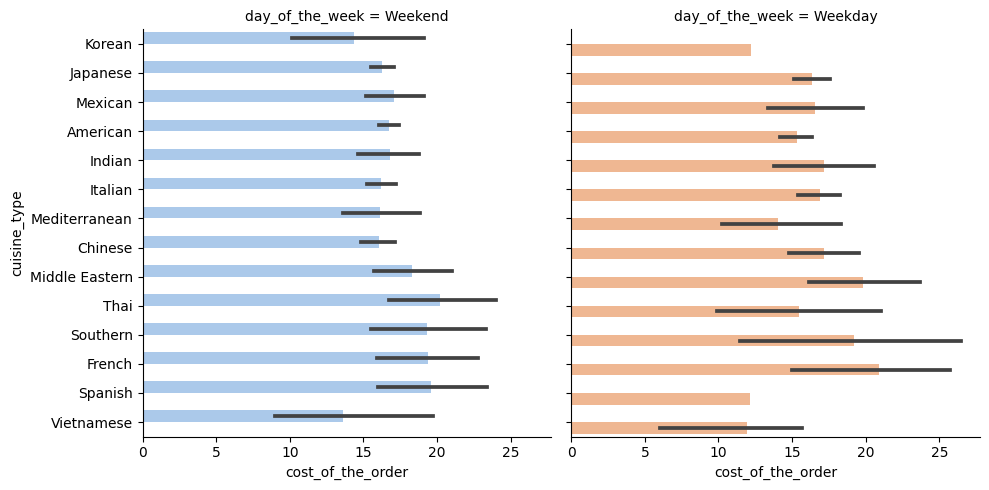

In [ ]:
# exploring potential relationships between the cost of an order, order volume, and the type of cuisine by time of the week
sns.catplot(data = df, x = 'cost_of_the_order', y = 'cuisine_type', hue = 'day_of_the_week', col = 'day_of_the_week', kind = 'bar', palette = 'pastel')

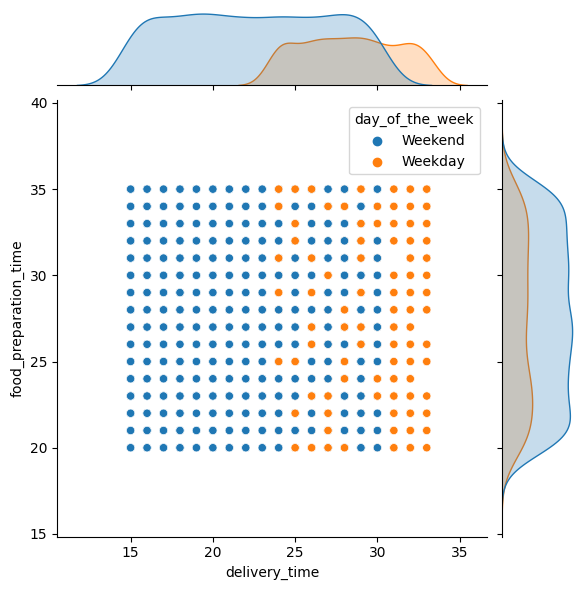

In [ ]:
# exploring the potential relationship between the time of the week, how long it takes to prep food, and whether that influences delivery times
sns.jointplot(data = df, x = 'delivery_time', y = 'food_preparation_time', hue = 'day_of_the_week')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# first need to convert rating to an integer by removing
df2 = df.drop(df[df['rating'] == 'Not given'].index) # using new df called df2 to avoid messing with original data set

df2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [ ]:
# converting to integer
df2['rating'] = pd.to_numeric(df2['rating'])

# confirming numeric conversion by pulling stat summary (originally wasn't available without selecting include = 'all')
df2['rating'].describe()

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [ ]:
# assessing which restaurants meet the > 50 ratings criteria -- since 'Not given' was removed, I can count the companies and know that they each have a corresponding rating
df2['restaurant_name'].groupby(df2['restaurant_name']).value_counts().nlargest(10) > 50

restaurant_name            restaurant_name          
Shake Shack                Shake Shack                   True
The Meatball Shop          The Meatball Shop             True
Blue Ribbon Sushi          Blue Ribbon Sushi             True
Blue Ribbon Fried Chicken  Blue Ribbon Fried Chicken     True
RedFarm Broadway           RedFarm Broadway             False
Parm                       Parm                         False
RedFarm Hudson             RedFarm Hudson               False
TAO                        TAO                          False
Rubirosa                   Rubirosa                     False
Han Dynasty                Han Dynasty                  False
Name: restaurant_name, dtype: bool

In [ ]:
# appyling ratings average > 4 rule to the restaurants with over 50 ratings
promo = pd.DataFrame(df2['rating'].groupby(df2['restaurant_name']).mean())

In [ ]:
# selecting restaurants that meet 50+ ratings a 4+ score
promogroup = promo.loc[['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']]

promogroup

,rating
restaurant_name,
Shake Shack,4.278195
The Meatball Shop,4.511905
Blue Ribbon Sushi,4.219178
Blue Ribbon Fried Chicken,4.328125


#### Observations: Restaurants meeting the > 50 ratings + an average rating over 4 starts criteria are: The Meatball Shop, Shake Shack, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# converting cost to float value to create calculated field
df2['cost_of_the_order'] = pd.to_numeric(df2['cost_of_the_order'])

df2['cost_of_the_order'].describe()

count    1162.000000
mean       16.760766
std         7.572578
min         4.470000
25%        12.130000
50%        14.600000
75%        22.750000
max        35.410000
Name: cost_of_the_order, dtype: float64

In [ ]:
# adding an empty column for revenue calculation
df2['total_cost'] = ''

df2

KeyError: ignored

In [ ]:
# applying calculation for total revenue
def revenue(df2):
    if df2['cost_of_the_order'] > 20:
        return (df2['cost_of_the_order'] + (df2['cost_of_the_order'] * 0.25))
    elif df2['cost_of_the_order'] > 5 & (df2['cost_of_the_order'] <= 20):
        return (df2['cost_of_the_order'] + (df2['cost_of_the_order'] * 0.15))
    elif df2['cost_of_the_order'] <= 5:
        return df2['cost_of_the_order']

df2['total_cost'] = df2.apply(revenue, axis = 1)

df2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_cost
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,14.0645
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,36.5000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,13.3285
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,31.5250
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,6.8655
...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,9.9820
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,18.0205
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,27.8875
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,14.0070


In [ ]:
# calculating total pre-fee revenue
df2['cost_of_the_order'].sum()

19476.01

In [ ]:
# calcuating total fee revenue
df2['total_cost'].sum()

23346.5875

In [ ]:
# creating column to include net revenue
df2['net_revenue'] = df2.apply(lambda row: row['total_cost'] - row['cost_of_the_order'], axis = 1)

df2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_cost,net_revenue
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,14.0645,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,36.5000,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,13.3285,1.7385
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,31.5250,6.3050
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,6.8655,0.8955
...,...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,9.9820,1.3020
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,18.0205,2.3505
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,27.8875,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,14.0070,1.8270


In [ ]:
# calcuating net revenue
df2['net_revenue'].sum()

3870.5774999999994

**Observations**: The total costs from orders before the surcharge is $19,476.01.

- Total revenue is $23,346.59.

- Net revenue is $3,870.58.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [ ]:
# first, creating column to summarize a combination between prep time and delivery time as a single value
df2['total_delivery_time'] = df2.apply(lambda row: row['food_preparation_time'] + row['delivery_time'], axis = 1)

df2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_cost,net_revenue,total_delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,14.0645,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,36.5000,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,13.3285,1.7385,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,31.5250,6.3050,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,6.8655,0.8955,63
...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,9.9820,1.3020,63
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,18.0205,2.3505,42
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,27.8875,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,14.0070,1.8270,50


In [ ]:
# calculating percentage of deliveries over 60 minutes
longer_wait = df2['total_delivery_time'] > 60

longer_wait.value_counts(normalize = True) # normalizing to get count of T/F as a percentage

False    0.89759
True     0.10241
Name: total_delivery_time, dtype: float64

#### Observations: 10.2% of orders take over 60 minutes to be delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<Axes: xlabel='rating', ylabel='total_delivery_time'>

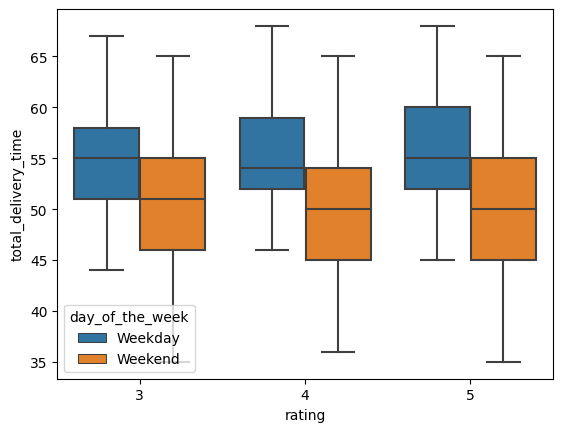

In [ ]:
# we can analyze this difference through visualization
sns.boxplot(data = df2, x = 'rating', y = 'total_delivery_time', hue = 'day_of_the_week')

#### Observations:
- Weekend delivery times are generally faster than weekday deliveries.
- Weekend deliveries recieve higher ratings than weekday deliveries.
- Weekday deliveries take more than 60 minutes to complete more often than weekend deliveries.
- Despite being faster, weekend deliveries are more commonly rated below 4.


## **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

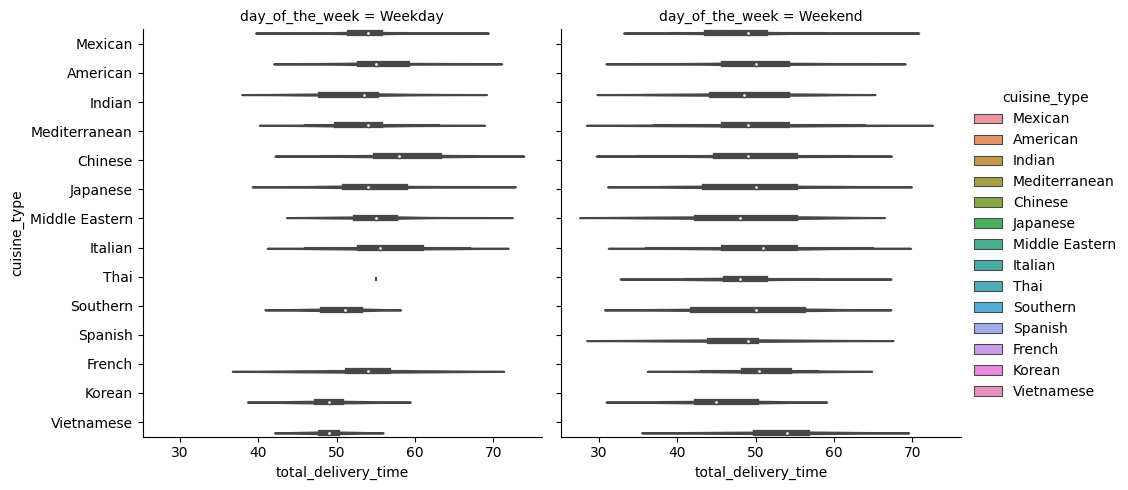

In [ ]:
# one more look at relevant values
sns.catplot(data = df2, x = 'total_delivery_time', y = 'cuisine_type', hue = 'cuisine_type', col = 'day_of_the_week', kind = 'violin')

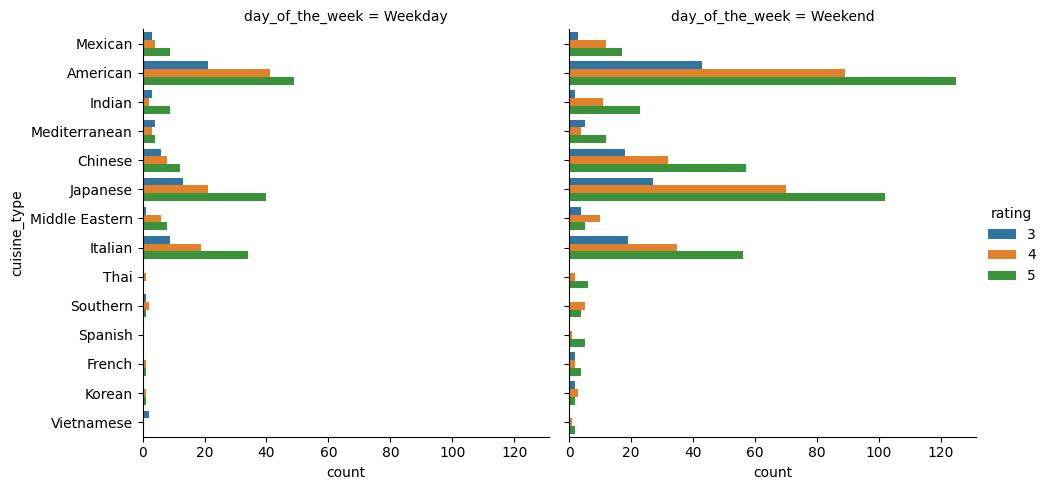

In [ ]:
# drilling into ratings once more
sns.catplot(data = df2, y = 'cuisine_type', hue = 'rating', col = 'day_of_the_week', kind = 'count')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


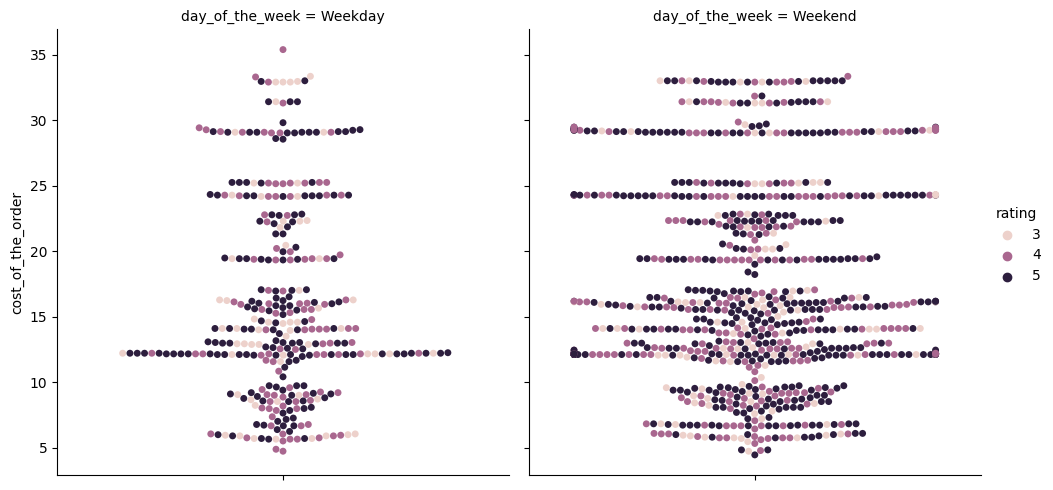

In [ ]:
# analyzing money spent vs time of the week
sns.catplot(data = df2, y = 'cost_of_the_order', hue = 'rating', col = 'day_of_the_week', kind = 'swarm')

### **Conclusions**:
- There is a preference among customers to order food on weekends.
- Customers spend more money on orders on average on the weeknds vs weekdays.
- There doesn't appear to be a correlation between the cost of an order and its rating
- There doesn't appear to be a correlation between cuisine type and rating.
- There doesn't appear to be a correlation between delivery time and rating.
- 8/14 cuisine types [Mexican, American, Indian, Mediterranean, Chinese, Japanese, Middle Eastern, Italian] make up for the majority of customer spending.
- Delivery times on weekends, though more arrive sooner than 60 minutes, are more unpredictable compared to a weekday.


### **Recommendations**:
- **Investigate why 42% of cuisine types lack order volume:** There is close to 0 activity across weekdays and weekends in 6/14 (over 42%) cuisine types. Is this due to a lack of awareness about what's out there? Is this regional? Is it due to a lack of drivers?
- **Seek to drive more weekday engagement:** While customers spend more money on the weekends, the overall volume nearly doubles or triples weekday orders across all cuisine categories. Driving app engagement and understanding why customers are ordering less during the week could become a significant driven of revenue.
- **Perform competitor analysis:** In addition to investigating the lack of weekday engagement, it is important to understand the competitive landscape within our markets, as our lack of order volume during the week could be due to greater market share of weekday orders by another delivery company.
- **Seek investment outside of traditional channels:** Given how few of our orders take over 60 minutes to deliver, it would be interesting to see how developing some accountability on our part could drive increased volume.
Rather than focus on coupons or other marketing spend, we could take advantage of our ~90% less than 60 minute delivery rate by saying that we waive our 15%-20% charge on any orders that take longer than 60 minutes.
- **Repricing:** Conversely, we can explore better segmentation within current pricing model to generate more net revenue from our current volume. There is a wide gap between $5 and $20 (15% charge), and an even wider opportunity over $20 (25% charge). I would recommend drilling further into this range:

  - $5 < cost < $10 (10%)
  - $10 < cost < $15 (15%)
  - $15 < cost < $25 (25%)
  - $25 < cost < $30 (30%)

---